In [1]:
import importlib
import utils
from utils import *
importlib.reload(utils)
from utils import *

Using TensorFlow backend.


In [36]:
'''
loading data
'''

xtrain, xtest, ytrain = load_data()
xtrain = xtrain.rename(columns={x:y for x,y in zip(xtrain.columns,range(0,len(xtrain.columns)))})

last_valid_idx = []

for i in range(0,xtrain.shape[0]):
    row = xtrain.iloc[i,:]
    idx = row.last_valid_index()
    last_valid_idx = np.append(last_valid_idx, idx)
    
#note to self: load_data() reshiffles the data
xtrain_tr = xtrain.iloc[:,0:7500]

'''
pad shorter series
''' 
is_nan = np.isnan(xtrain_tr.iloc[:,-1].values) 
xtrain_tr1 = xtrain_tr[is_nan == False]  #shape = (4565, 7500)
xtrain_tr2 = xtrain_tr[is_nan == True]

#calculate column medians 
medians = np.array(xtrain_tr1.median(axis=0))

for j in xtrain_tr2.columns:
    xtrain_tr2.iloc[:,j] = xtrain_tr2.iloc[:,j].fillna(value = medians[j], axis = 0)

xtrain_tr_filled = pd.concat([xtrain_tr1, xtrain_tr2])
print(xtrain_tr_filled.isnull().values.any())

False


'\nfrom now on, we operate on xtrain_tr_filled -- shape (5117, 7500)\n'

In [206]:
'''
Save orginals in case you screw up
'''

X_train_original = xtrain
y_train_original = ytrain 
X_test_original = xtest
xtrain_tr_filled_original = xtrain_tr_filled

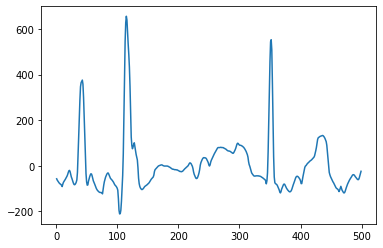

In [155]:
plt.plot(xtrain_tr_filled.iloc[3,1:500])
plt.show()

In [156]:
'''
Extract Heartbeats and Rpeaks
'''
import biosppy.signals.ecg as bs_ecg

X_train = xtrain_tr_filled

templates_array = []
RR_peaks_array = []
for i in range(X_train.shape[0]):
    beats_info = bs_ecg.ecg(signal= X_train.iloc[i,:], sampling_rate=300, show=False)
    templates_beats = beats_info['templates']  
    templates_array.append(templates_beats)
    RR_peaks = beats_info['rpeaks']  # this gives indices for rpeaks only in the X_train series 
    RR_peaks_array.append(RR_peaks)
    print(i)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063


3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706


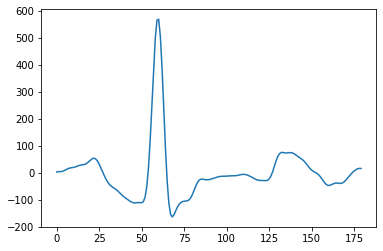

In [157]:
'''
plotting an example of templates
'''

plt.plot(templates_array[2][1])
plt.show()

In [158]:
'''
extracting rpeak values from X_train
'''

rrpeaks_array = []

for i in range(X_train.shape[0]):
    max_values = X_train.iloc[i,RR_peaks_array[i]]  # RR_peaks_array gives the indices of rrpeaks
    rrpeaks_array.append(max_values)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096


3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806


In [159]:
'''
statistics for RR peaks: 
mean, min, max, std -- these will features in our model 
'''

RR_mean_array = []
RR_max_array = []
RR_min_array = []
RR_std_array = []

for i in range(X_train.shape[0]):
    max_value_i = np.max(rrpeaks_array[i])
    min_value_i = np.min(rrpeaks_array[i])
    mean_value_i = np.mean(rrpeaks_array[i])
    std_value_i = np.std(rrpeaks_array[i])
    
    RR_max_array.append(max_value_i)
    RR_min_array.append(min_value_i)
    RR_mean_array.append(mean_value_i)
    RR_std_array.append(std_value_i)

In [160]:
'''
statistics for aggregate heartbeats -- as given in templates: 
mean, min, std -- these will features in our model (max in obtained above via RR peaks, we avoit it here) 
'''
mean_hb_array = []
min_hb_array = []
std_hb_array = []

for i in range(X_train.shape[0]):
    min_hb_value = np.min(templates_array[i])
    mean_hb_value = np.mean(templates_array[i])
    std_hb_value = np.std(templates_array[i])
    
    mean_hb_array.append(mean_hb_value)
    min_hb_array.append(min_hb_value)
    std_hb_array.append(std_hb_value)

In [161]:
'''
compute FT of mean heart bit for every data point (Note: this is calculated pointwise)
This will also be used as a feature
'''

mean_templates_array = []
for i in range(X_train.shape[0]):
    mean_array = np.mean(templates_array[i], axis = 0)
    mean_templates_array.append(mean_array)

mean_matrix = np.array(mean_templates_array)
X_ft = np.fft.rfft(mean_matrix, axis=1)

In [142]:
'''
Create new dataset with features summary statistics and FT
'''




# Feature estraction

source: https://github.com/Xivid/Advanced-Machine-Learning-Projects/blob/master/task3/BioFeature.ipynb

In [210]:
X = X_train_original.values
y = y_train_original.values
X_test = X_test_original.values

In [192]:
from sklearn.utils import check_array

class BioFeature():
    def __init__(self, sample_rate=300,
                 threshold=0.48, segstart=90, segend=110):
        self.sample_rate = sample_rate
        self.threshold = threshold
        self.segstart = segstart  # Q-R interval
        self.segend = segend      # R-S interval

    def fit(self, X, y=None):
        X = check_array(X)
        return self

    def transform(self, X, y=None):
        # X = check_array(X)
        T = 1.0 / self.sample_rate
        bio_feature = np.empty(1)
        for i in range(X.shape[0]):
            if i % 50 == 0:
                print("processed %d" % i)
            Xi = X[i]
            rpeaks = bs_ecg.engzee_segmenter(Xi,
                                          sampling_rate=300,
                                          threshold=self.threshold)
            rpeaks = rpeaks[0]
            # 1. compute the mean of DFT for one QRS wave
            QR_int = self.segstart    # Q-R interval
            RS_int = self.segend      # R-S interval
            m_idx = X.shape[1] - RS_int
            idx = np.where((rpeaks > QR_int) & (rpeaks < m_idx))
            idx = idx[0]
            new_rpeaks = rpeaks[idx]
            _fft = np.zeros(QR_int + RS_int)
            for j in range(len(new_rpeaks)):
                # extract segment around rpeaks
                QRS = Xi[new_rpeaks[j] - QR_int:new_rpeaks[j] + RS_int]
                # compute the mean of DFT
                fft = np.fft.fft(QRS)
                fft_amp = np.absolute(fft)
                if j == 0:
                    _fft = fft_amp
                else:
                    _fft = np.vstack((_fft, fft_amp))
            fft_mean = np.mean(_fft, axis=0)
            if len(new_rpeaks) == 0 or len(new_rpeaks) == 1:
                fft_mean = _fft
                
            # 2. compute the statistics of heart beat
            out = bs_ecg.ecg(signal=Xi, sampling_rate=300,
                          show=False)
            [ts, sig, rpeaks, temp_ts, temp, hr_ts, heart_rate] = out
            heart_stats = [0, 0, 0, 0]
            if len(heart_rate) != 0:
                heart_stats[0] = np.mean(heart_rate)
                heart_stats[1] = np.var(heart_rate)
                heart_stats[2] = np.amin(heart_rate)
                heart_stats[3] = np.amax(heart_rate)
            heart_stats = np.asarray(heart_stats)

            # 3. compute the statistics of R-R interval
            RR_int = []
            for k in range(1, len(rpeaks)):
                RR_int.append(T * (rpeaks[k] - rpeaks[k-1]))
            RR_int = np.asarray(RR_int)
            RR_stats = [0, 0, 0, 0]
            if len(RR_int) != 0:
                RR_stats[0] = np.mean(RR_int)
                RR_stats[1] = np.var(RR_int)
                RR_stats[2] = np.amin(RR_int)
                RR_stats[3] = np.amax(RR_int)
            RR_stats = np.asarray(RR_stats)

            feature = np.hstack((fft_mean, heart_stats))
            feature = np.hstack((feature, RR_stats))
            if i == 0:
                bio_feature = feature
            else:
                bio_feature = np.vstack((bio_feature, feature))
        return bio_feature
fs = BioFeature()

In [193]:
signals = []
with open("X_train.csv") as f_train:
    for line in f_train.readlines()[1:]:
        s = list(map(int, line.split(',')[1:]))
        if len(s) < 18155:
            s.extend([0 for x in range(len(s), 18155)])
        signals.append(s)
signals = np.array([np.array(s) for s in signals])
y = np.loadtxt('y_train.csv', delimiter=',', skiprows=1, usecols=range(1,2))

In [194]:
bioFeatures = fs.transform(signals)

processed 0
processed 50
processed 100
processed 150
processed 200
processed 250
processed 300
processed 350
processed 400
processed 450
processed 500
processed 550
processed 600
processed 650
processed 700
processed 750
processed 800
processed 850
processed 900
processed 950
processed 1000
processed 1050
processed 1100
processed 1150
processed 1200
processed 1250
processed 1300
processed 1350
processed 1400
processed 1450
processed 1500
processed 1550
processed 1600
processed 1650
processed 1700
processed 1750
processed 1800
processed 1850
processed 1900
processed 1950
processed 2000
processed 2050
processed 2100
processed 2150
processed 2200
processed 2250
processed 2300
processed 2350
processed 2400
processed 2450
processed 2500
processed 2550
processed 2600
processed 2650
processed 2700
processed 2750
processed 2800
processed 2850
processed 2900
processed 2950
processed 3000
processed 3050
processed 3100
processed 3150
processed 3200
processed 3250
processed 3300
processed 3350
pro

In [196]:
from sklearn.base import BaseEstimator, TransformerMixin

class HRVFeature(BaseEstimator, TransformerMixin):
    """ Adpated from <<van Gent, P. (2016).
    Analyzing a Discrete Heart Rate Signal Using Python.
    A tech blog about fun things with Python and embedded electronics>>"""
    """ feature includes: BPM, IBI, SDNN. SDSD, RMSSD, pNN50, pNN20 """
    def __init__(self, sample_rate=300,
                 start=40, end=50, save_path=None):
        self.sample_rate = sample_rate
        self.segstart = start
        self.segend = end
        self.save_path = save_path

    def fit(self, X, y=None):
        X = check_array(X)
        return self

    def transform(self, X, y=None):
        T = 1.0 / self.sample_rate
        bio_feature = np.empty(1)
        for i in range(X.shape[0]):
            if i % 50 == 0:
                print("processed %d" % i)
            Xi = X[i, :]
            # extract the R-peaks positions
            out = bs_ecg.ecg(signal=Xi, sampling_rate=300,
                          show=False)
            [ts, sig, rpeaks, temp_ts, temp, hr_ts, heart_rate] = out
            # 1. Extract Time Domain Measures
            # Compute the R-R interval (ms)
            RR_int = []
            for k in range(1, len(rpeaks)):
                RR_int.append(1000.0 * T * (rpeaks[k] - rpeaks[k - 1]))
            RR_int = np.asarray(RR_int)
            # Compute the R-R interval difference
            RR_diff = []    # difference between adajacent RR interval
            RR_sqdiff = []  # squared difference of RR interval
            for k in range(1, len(RR_int)):
                m_diff = RR_int[k] - RR_int[k - 1]
                RR_diff.append(abs(m_diff))
                RR_sqdiff.append(math.pow(m_diff, 2))
            RR_diff = np.asarray(RR_diff)
            RR_sqdiff = np.asarray(RR_sqdiff)

            bio_feature = np.zeros(10)
            if len(RR_int) >= 1:
                # 1.ibi measure: the mean of the R-R interval
                ibi = np.mean(RR_int)
                bio_feature[0] = ibi

                # 2.sdn measure: the standard deviation of R-R intervals
                sdnn = np.std(RR_int)
                bio_feature[1] = sdnn

                # 3. max of the R-R interval
                bio_feature[2] = np.amax(RR_int)

                # data = pd.Series(RR_int)
                # arma_mod4 = sm.tsa.ARMA(data, (4,0)).fit()
                # bio_feature[3] = arma_mod4.params[0]
                # bio_feature[4] = arma_mod4.params[1]
                # bio_feature[5] = arma_mod4.params[2]
                # bio_feature[6] = arma_mod4.params[3]

                if len(RR_diff) >= 1:
                    # 5.sdsd measure: the standard deviation of the R-R diff
                    sdsd = np.std(RR_diff)
                    bio_feature[3] = sdsd

                    # 6. the mean , min, max of the R-R difference
                    bio_feature[4] = np.mean(RR_diff)
                    bio_feature[5] = np.amax(RR_diff)

                    # 4.rsmd measure: the root mean square of R-R differences
                    rmssd = np.sqrt(np.mean(RR_sqdiff))
                    bio_feature[6] = rmssd

                    # 5. pnn20/50: the percentage of differences > 50/20 ms
                    nn20 = [x for x in RR_diff if (x > 20)]
                    nn50 = [x for x in RR_diff if (x > 50)]
                    pnn20 = float(len(nn20)) / float(len(RR_diff))
                    pnn50 = float(len(nn50)) / float(len(RR_diff))
                    bio_feature[7] = pnn20
                    bio_feature[8] = pnn50

                # 6. bpm measure: the average heart rate per minute
                # bpm = np.mean(heart_rate)
                bpm = 60000 / np.mean(RR_int)
                bio_feature[9] = bpm

                # 7. extract the QRS waves and use the mean as feature
                QR_int = self.segstart    # Q-R interval
                RS_int = self.segend      # R-S interval
                m_idx = X.shape[1] - RS_int
                idx = np.where((rpeaks > QR_int) & (rpeaks < m_idx))
                idx = idx[0]
                new_rpeaks = rpeaks[idx]
                nQRS = np.zeros(QR_int + RS_int)
                for j in range(len(new_rpeaks)):
                    # extract segment around rpeaks
                    QRS = Xi[new_rpeaks[j] - QR_int:new_rpeaks[j] + RS_int]
                    # QRS = np.absolute(np.fft.fft(QRS))
                    # compute the mean of DFT
                    if j == 0:
                        nQRS = QRS
                    else:
                        nQRS = np.vstack((nQRS, QRS))
                QRS_mean = np.mean(nQRS, axis=0)
                if len(new_rpeaks) == 0 or len(new_rpeaks) == 1:
                    QRS_mean = nQRS
                bio_feature = np.hstack((bio_feature, QRS_mean))

            for j in range(len(bio_feature)):
                if np.isnan(bio_feature[j]):
                    print("Error in extracting sample")
                    print(i)
                    print(":found NaN in bio_feature")
            if i == 0:
                features = bio_feature
            else:
                features = np.vstack((features, bio_feature))
        return features
hrvfs = HRVFeature()

In [197]:
signals = []
with open("X_train.csv") as f_train:
    for line in f_train.readlines()[1:]:
        s = list(map(int, line.split(',')[1:]))
        if len(s) < 18155:
            s.extend([0 for x in range(len(s), 18155)])
        signals.append(s)
signals = np.array([np.array(s) for s in signals])
y = np.loadtxt('y_train.csv', delimiter=',', skiprows=1, usecols=range(1,2))

In [198]:
hrvFeatures = hrvfs.transform(signals)

processed 0
processed 50
processed 100
processed 150
processed 200
processed 250
processed 300
processed 350
processed 400
processed 450
processed 500
processed 550
processed 600
processed 650
processed 700
processed 750
processed 800
processed 850
processed 900
processed 950
processed 1000
processed 1050
processed 1100
processed 1150
processed 1200
processed 1250
processed 1300
processed 1350
processed 1400
processed 1450
processed 1500
processed 1550
processed 1600
processed 1650
processed 1700
processed 1750
processed 1800
processed 1850
processed 1900
processed 1950
processed 2000
processed 2050
processed 2100
processed 2150
processed 2200
processed 2250
processed 2300
processed 2350
processed 2400
processed 2450
processed 2500
processed 2550
processed 2600
processed 2650
processed 2700
processed 2750
processed 2800
processed 2850
processed 2900
processed 2950
processed 3000
processed 3050
processed 3100
processed 3150
processed 3200
processed 3250
processed 3300
processed 3350
pro

In [199]:
with open("bioFeatures.csv", "w") as f:
    for idx,vals in enumerate(bioFeatures):
        s = str(idx)
        for v in vals:
            s += ",%f" % v
        s += "\n"
        f.write(s)

In [200]:
with open("hrvFeatures.csv", "w") as f:
    for idx,vals in enumerate(hrvFeatures):
        s = str(idx)
        for v in vals:
            s += ",%f" % v
        s += "\n"
        f.write(s)

In [201]:
y = np.loadtxt('y_train.csv', delimiter=',', skiprows=1, usecols=range(1,2))

In [211]:
X_add = np.loadtxt('rpeakfeature.csv', delimiter=',', skiprows=1, usecols=range(1,9))
newX = []
for i in range(len(X)):
     newX.append(np.concatenate([X[i], X_add[i]]))

IndexError: index 0 is out of bounds for axis 0 with size 0

In [204]:
X_add2 = hrvfs.transform(np.array([np.array(s) for s in signals]))

processed 0
processed 50
processed 100
processed 150
processed 200
processed 250
processed 300
processed 350
processed 400
processed 450
processed 500
processed 550
processed 600
processed 650
processed 700
processed 750
processed 800
processed 850
processed 900
processed 950
processed 1000
processed 1050
processed 1100
processed 1150
processed 1200
processed 1250
processed 1300
processed 1350
processed 1400
processed 1450
processed 1500
processed 1550
processed 1600
processed 1650
processed 1700
processed 1750
processed 1800
processed 1850
processed 1900
processed 1950
processed 2000
processed 2050
processed 2100
processed 2150
processed 2200
processed 2250
processed 2300
processed 2350
processed 2400
processed 2450
processed 2500
processed 2550
processed 2600
processed 2650
processed 2700
processed 2750
processed 2800
processed 2850
processed 2900
processed 2950
processed 3000
processed 3050
processed 3100
processed 3150
processed 3200
processed 3250
processed 3300
processed 3350
pro